In [145]:
import numpy as np
import scipy.io as sio
import matplotlib.pylab as plt
import math
import scipy.linalg as slin
import scipy.optimize as op

In [2]:
# Setup the parameters you will use for this exercise
input_layer_size  = 400;  # 20x20 Input Images of Digits
hidden_layer_size = 25;   # 25 hidden units
num_labels = 10;          # 10 labels, from 1 to 10   

# =========== Part 1: Loading and Visualizing Data =============

In [17]:
def displayData(x):
    width = round(math.sqrt(np.size(x, 1)))
    m, n = np.shape(x)
    height = int(n/width)
    
    drows = math.floor(math.sqrt(m))
    dcols = math.ceil(m/drows)

    pad = 1
    
    darray = -1*np.ones((pad+drows*(height+pad), pad+dcols*(width+pad)))

    curr_ex = 0
    for j in range(drows):
        for i in range(dcols):
            if curr_ex >= m:
                break
            max_val = np.max(np.abs(X[curr_ex, :]))
            darray[pad+j*(height+pad):pad+j*(height+pad)+height, pad+i*(width+pad):pad+i*(width+pad)+width]\
                = x[curr_ex, :].reshape((height, width))/max_val
            curr_ex += 1
        if curr_ex >= m:
            break

    plt.imshow(darray.T, cmap='gray')
    plt.show()

Loading and Visualizing Data ...


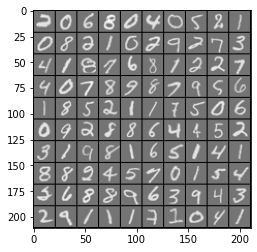

In [34]:
print('Loading and Visualizing Data ...')

dataInfo = sio.loadmat('./ex4/ex4data1.mat');
X = dataInfo['X']
y = dataInfo['y'][:,0]
m = np.size(X, 0)

# Randomly select 100 data points to display
rand_indices = np.random.permutation(m)
sel = X[rand_indices[0:100], :]

displayData(sel)

# ================ Part 2: Loading Parameters ================

In [57]:
print('Loading Saved Neural Network Parameters ...')

# Load the weights into variables Theta1 and Theta2
theta = sio.loadmat('./ex4/ex4weights.mat');

# Unroll parameters 
nn_params = np.concatenate((theta1.flatten(), theta2.flatten()))

Loading Saved Neural Network Parameters ...


# ================ Part 3: Compute Cost (Feedforward) ================

In [47]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g
def sigmoidGradient(z):
    g = sigmoid(z) * (1-sigmoid(z))
    return g

In [122]:
def nnCostFunc(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lamb):
    theta1 = nn_params[0:hidden_layer_size*(input_layer_size+1)].reshape((hidden_layer_size, input_layer_size+1))
    theta2 = nn_params[(hidden_layer_size*(input_layer_size+1)):].reshape((num_labels, hidden_layer_size+1))
    m = np.size(X, 0)
   
    
    a1 = np.c_[np.ones([m, 1]), X]
    z2 = a1.dot(theta1.T)
    l2 = np.size(z2, 0)
    a2 = np.c_[np.ones([l2, 1]), sigmoid(z2)]
    z3 = a2.dot(theta2.T)
    a3 = sigmoid(z3)
    yt = np.zeros((m, num_labels))
    yt[np.arange(m), y-1] = 1
    j = np.sum(-yt*np.log(a3) - (1-yt)*np.log(1-a3))
    
    delta3 = a3 - yt
    delta2 = delta3.dot(theta2)*sigmoidGradient(np.c_[np.ones([l2, 1]), z2])
    theta2_grad = delta3.T.dot(a2)
    theta1_grad = delta2[:, 1:].T.dot(a1)
    
    j = j/m
    theta2_grad = theta2_grad / m
    theta2_grad[:, 1:] = theta2_grad[:, 1:] + lamb/m*theta2[:, 1:]
    theta1_grad = theta1_grad/m
    theta1_grad[:, 1:] = theta1_grad[:, 1:]+lamb/m*theta1[:, 1:]
    reg_cost = np.sum(np.power(theta1[:, 1:], 2)) + np.sum(np.power(theta2[:, 1:], 2))
    j = j+1/(2*m)*lamb*reg_cost
    
    grad = np.concatenate((theta1_grad.flatten(), theta2_grad.flatten()))
    return j, grad

In [118]:
print('Feedforward Using Neural Network ...')

# Weight regularization parameter (we set this to 0 here).
lamb = 0

j, _ = nnCostFunc(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lamb)
print('Cost at parameters (loaded from ex4weights): %f \n(this value should be about 0.287629)' % j)

Feedforward Using Neural Network ...
(25, 401) (10, 26) (5000, 10) (5000, 26)
Cost at parameters (loaded from ex4weights): 0.287629 
(this value should be about 0.287629)


# =============== Part 4: Implement Regularization ===============

In [124]:
print('Checking Cost Function (w/ Regularization) ... ')

# Weight regularization parameter (we set this to 1 here).
lamb = 1;

j, _ = nnCostFunc(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lamb);

print('Cost at parameters (loaded from ex4weights): %f \n(this value should be about 0.383770)\n' % j);

Checking Cost Function (w/ Regularization) ... 
Cost at parameters (loaded from ex4weights): 0.383770 
(this value should be about 0.383770)



# ================ Part 5: Sigmoid Gradient  ================

In [129]:
print('Evaluating sigmoid gradient...')

g = sigmoidGradient(np.array([-1, -0.5, 0, 0.5, 1]));
print('Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:\n  ');
print(g);

Evaluating sigmoid gradient...
Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:
  
[0.19661193 0.23500371 0.25       0.23500371 0.19661193]


In [130]:
np.array([-1, -0.5, 0, 0.5, 1])

array([-1. , -0.5,  0. ,  0.5,  1. ])

# ================ Part 6: Initializing Pameters ================

In [140]:
def randInitializeWeights(lin, lout):
    epsilon_init = 0.12
    w = np.random.rand(lout, lin+1)*2*epsilon_init-epsilon_init;
    return w

In [142]:
print('Initializing Neural Network Parameters ...')

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)

# Unroll parameters
init_nn_params = np.concatenate((initial_Theta1.flatten(), initial_Theta2.flatten()))

Initializing Neural Network Parameters ...


# =============== Part 7: Implement Backpropagation ===============

In [149]:
def debugInitWeights(fout, fin):
    w = np.sin(np.arange(fout*(fin+1))+1).reshape(fout, fin+1)/10
    return w

def computeNumericalGradient(J, theta, args):
    numgrad = np.zeros(np.size(theta))
    perturb = np.zeros(np.size(theta))
    epsilon = 1e-4
    for i in range(np.size(theta)):
        perturb[i] = epsilon
        loss1, _ = J(theta-perturb, *args)
        loss2, _ = J(theta+perturb, *args)
        numgrad[i] = (loss2-loss1)/(2*epsilon)
        perturb[i] = 0
    return numgrad


def checkNNGradients(lamb):
    input_layer_size = 3
    hidden_layer_size = 5
    num_labels = 3
    m = 5

    theta1 = debugInitWeights(hidden_layer_size, input_layer_size)
    theta2 = debugInitWeights(num_labels, hidden_layer_size)

    x = debugInitWeights(m, input_layer_size-1)
    y = 1+(np.arange(m)+1) % num_labels

    nn_params = np.concatenate((theta1.flatten(), theta2.flatten()))

    cost, grad = nnCostFunc(nn_params, input_layer_size, hidden_layer_size, num_labels, x, y, lamb)
    numgrad = computeNumericalGradient(nnCostFunc, nn_params,\
                                       (input_layer_size, hidden_layer_size, num_labels, x, y, lamb))
    print(numgrad, '\n', grad)
    print('The above two columns you get should be very similar.\n \
    (Left-Your Numerical Gradient, Right-Analytical Gradient)')
    diff = slin.norm(numgrad-grad)/slin.norm(numgrad+grad)
    print('If your backpropagation implementation is correct, then \n\
         the relative difference will be small (less than 1e-9). \n\
         \nRelative Difference: ', diff)

In [150]:
print('Checking Backpropagation... ');

# Check gradients by running checkNNGradients
checkNNGradients(0)

print('Program paused. Press enter to continue.');

Checking Backpropagation... 
[ 1.23162247e-02  1.73828185e-04  2.61455146e-04  1.08701450e-04
  3.92471369e-03  1.90101250e-04  2.22272334e-04  5.00872543e-05
 -8.08459407e-03  3.13170645e-05 -2.17840346e-05 -5.48569878e-05
 -1.26669105e-02 -1.56130209e-04 -2.45506164e-04 -1.09164882e-04
 -5.59342546e-03 -2.00036570e-04 -2.43630216e-04 -6.32313668e-05
  3.09347722e-01  1.61067138e-01  1.47036522e-01  1.58268577e-01
  1.57616707e-01  1.47236360e-01  1.08133003e-01  5.61633717e-02
  5.19510542e-02  5.47353405e-02  5.53082757e-02  5.17752619e-02
  1.06270372e-01  5.57611045e-02  5.05568118e-02  5.38805142e-02
  5.47407215e-02  5.02929547e-02] 
 [ 1.23162247e-02  1.73828184e-04  2.61455144e-04  1.08701450e-04
  3.92471369e-03  1.90101252e-04  2.22272331e-04  5.00872547e-05
 -8.08459407e-03  3.13170587e-05 -2.17840341e-05 -5.48569864e-05
 -1.26669105e-02 -1.56130210e-04 -2.45506163e-04 -1.09164881e-04
 -5.59342547e-03 -2.00036572e-04 -2.43630220e-04 -6.32313673e-05
  3.09347722e-01  1.61067

# =============== Part 8: Implement Regularization ===============

In [152]:
print('Checking Backpropagation (w/ Regularization) ... ')

#  Check gradients by running checkNNGradients
lamb = 3
checkNNGradients(lamb)

debug_j, _ =nnCostFunc(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lamb)
print('Cost at (fixed) debugging parameters (w/ lambda = 10): %f \n(this value should be about 0.576051)' % debug_j)

Checking Backpropagation (w/ Regularization) ... 
[ 0.01231622  0.05473167  0.00872866 -0.04529945  0.00392471 -0.01657483
  0.03964147  0.05941158 -0.00808459 -0.03260995 -0.0600212  -0.03224923
 -0.01266691  0.05928031  0.03877176 -0.01738336 -0.00559343 -0.04525927
  0.008749    0.05471348  0.30934772  0.21562498  0.15550372  0.11286043
  0.10008125  0.13047143  0.108133    0.11552487  0.07667816  0.02209407
 -0.00469114  0.01958089  0.10627037  0.11519755  0.08957408  0.03660632
 -0.00294313  0.00523372] 
 [ 0.01231622  0.05473167  0.00872866 -0.04529945  0.00392471 -0.01657483
  0.03964147  0.05941158 -0.00808459 -0.03260995 -0.0600212  -0.03224923
 -0.01266691  0.05928031  0.03877176 -0.01738336 -0.00559343 -0.04525927
  0.008749    0.05471348  0.30934772  0.21562498  0.15550372  0.11286043
  0.10008125  0.13047143  0.108133    0.11552487  0.07667816  0.02209407
 -0.00469114  0.01958089  0.10627037  0.11519755  0.08957408  0.03660632
 -0.00294313  0.00523372]
The above two column

# =================== Part 8: Training NN ===================

In [153]:
def nnCost(params, input_layer_size, hidden_layer_size, num_labels, x, y, lamb):
    theta1 = params[0:hidden_layer_size * (input_layer_size + 1)].reshape(hidden_layer_size, input_layer_size + 1)
    theta2 = params[hidden_layer_size * (input_layer_size + 1):].reshape(num_labels, hidden_layer_size + 1)
    m = np.size(x, 0)

    # 前向传播 --- 下标：0代表1， 9代表10
    a1 = np.concatenate((np.ones((m, 1)), x), axis=1)
    z2 = a1.dot(theta1.T);
    l2 = np.size(z2, 0)
    a2 = np.concatenate((np.ones((l2, 1)), sigmoid(z2)), axis=1)
    z3 = a2.dot(theta2.T)
    a3 = sigmoid(z3)
    yt = np.zeros((m, num_labels))
    yt[np.arange(m), y - 1] = 1
    j = np.sum(-yt * np.log(a3) - (1 - yt) * np.log(1 - a3))
    # 向后传播
    j = j / m
    reg_cost = np.sum(np.power(theta1[:, 1:], 2)) + np.sum(np.power(theta2[:, 1:], 2))
    j = j + 1 / (2 * m) * lamb * reg_cost
    return j

def nnGrad(params, input_layer_size, hidden_layer_size, num_labels, x, y, lamb):
    theta1 = params[0:hidden_layer_size * (input_layer_size + 1)].reshape(hidden_layer_size, input_layer_size + 1)
    theta2 = params[(hidden_layer_size * (input_layer_size + 1)):].reshape(num_labels, hidden_layer_size + 1)
    m = np.size(x, 0)
    # 前向传播 --- 下标：0代表1， 9代表10
    a1 = np.concatenate((np.ones((m, 1)), x), axis=1)
    z2 = a1.dot(theta1.T);
    l2 = np.size(z2, 0)
    a2 = np.concatenate((np.ones((l2, 1)), sigmoid(z2)), axis=1)
    z3 = a2.dot(theta2.T)
    a3 = sigmoid(z3)
    yt = np.zeros((m, num_labels))
    yt[np.arange(m), y - 1] = 1
    # 向后传播
    delta3 = a3 - yt
    delta2 = delta3.dot(theta2) * sigmoidGradient(np.concatenate((np.ones((l2, 1)), z2), axis=1))
    theta2_grad = delta3.T.dot(a2)
    theta1_grad = delta2[:, 1:].T.dot(a1)

    theta2_grad = theta2_grad / m
    theta2_grad[:, 1:] = theta2_grad[:, 1:] + lamb / m * theta2[:, 1:]
    theta1_grad = theta1_grad / m
    theta1_grad[:, 1:] = theta1_grad[:, 1:] + lamb / m * theta1[:, 1:]

    grad = np.concatenate((theta1_grad.flatten(), theta2_grad.flatten()))
    return grad

In [155]:
print('Training Neural Network...')
lamb = 1
param = op.fmin_cg(nnCost, init_nn_params, fprime=nnGrad, \
                    args=(input_layer_size, hidden_layer_size, num_labels, X, y, lamb), maxiter=50)

theta1 = param[0: hidden_layer_size*(input_layer_size+1)].reshape(hidden_layer_size, input_layer_size+1)
theta2 = param[hidden_layer_size*(input_layer_size+1):].reshape(num_labels, hidden_layer_size+1)

Training Neural Network...
         Current function value: 0.449458
         Iterations: 50
         Function evaluations: 107
         Gradient evaluations: 107


# ================= Part 9: Visualize Weights =================

Visualizing Neural Network...


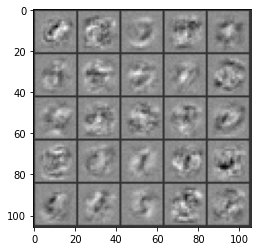

In [156]:
print('Visualizing Neural Network...')
displayData(theta1[:, 1:])

# ================= Part 10: Implement Predict =================

In [160]:
def predict(t1, t2, x):
    m = np.size(x, 0)
    x = np.concatenate((np.ones((m, 1)), x), axis=1)
    temp1 = sigmoid(x.dot(theta1.T))
    temp = np.concatenate((np.ones((m, 1)), temp1), axis=1)
    temp2 = sigmoid(temp.dot(theta2.T))
    p = np.argmax(temp2, axis=1)+1
    return p

In [162]:
pred = predict(theta1, theta2, X)
print('Training Set Accuracy: ', np.sum(pred == y)/np.size(y, 0))

Training Set Accuracy:  0.9654
